# 개요, 텍스트 파일 읽기

Friends 대화 내용 데이터는 JSON 파일로 제공된다.

다음 속성에 따라 JSON 파일을 파싱하고, 텍스트와 코드의 쌍으로 생성한다.

|    항목    |     설명    |
|:----------:|:-----------:|
|   speaker  | 발화의 주체 |
|  utterance | 대화 텍스트 |
|   emotion  |     감정    |
| annotation |  일련 번호  |

|   감정  | 코드 |     감정    | 코드 |
|:-------:|:----:|:-----------:|:----:|
| neutral |   0  |    anger    |   4  |
|   joy   |   1  |   surprise  |   5  |
| sadness |   2  |   disgust   |   6  |
|   fear  |   3  | non-neutral |   7  |

In [52]:
import json
import os
import nltk
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [43]:
emoDict = {'neutral': 0, 'joy': 1, 'sadness': 2, 'fear': 3, 'anger': 4, 
           'surprise': 5, 'disgust': 6, 'non-neutral': 7}

In [46]:
def read_json(file):
    with open(file) as json_file:
        data = [(dialog['utterance'].replace('\x92', "'").replace('\x91', "'"), emoDict[dialog['emotion']]) 
                for dialogs in json.load(json_file) for dialog in dialogs]
    return data

In [47]:
train_data = read_json('friends_train.json')
test_data = read_json('friends_test.json')

In [48]:
print(len(train_data))
print(len(train_data[0]))

10561
2


In [49]:
print(len(test_data))
print(len(test_data[0]))

2764
2


# 형태소 분석 및 품사 태깅

문장 단위의 데이터를 단어 단위로 분석하고, 불용어를 제거하기 위해서는 전처리 과정이 필요하다.

NLTK 라이브러리를 이용하여 이 작업을 수행할 수 있다.

In [55]:
print(pos_tag(word_tokenize(u"I'm on the edge of glory.")))

[('I', 'PRP'), ("'m", 'VBP'), ('on', 'IN'), ('the', 'DT'), ('edge', 'NN'), ('of', 'IN'), ('glory', 'NN'), ('.', '.')]


In [56]:
def tokenize(doc):
    return ['/'.join(t) for t in pos_tag(word_tokenize(doc))]

## 학습 데이터 형태소 분석 및 품사 태깅

In [57]:
if os.path.isfile('train_docs_en.json'):
    with open('train_docs_en.json') as f_read:
        train_docs = json.load(f_read)
else:
    train_docs = [(tokenize(row[0]), row[1]) for row in train_data]
    with open('train_docs_en.json', 'w', encoding='utf-8') as f_write:
        json.dump(train_docs, f_write, ensure_ascii=False, indent='\t')

## 테스트 데이터 형태소 분석 및 품사 태깅

In [58]:
if os.path.isfile('test_docs_en.json'):
    with open('test_docs_en.json') as f_read:
        test_docs = json.load(f_read)
else:
    test_docs = [(tokenize(row[0]), row[1]) for row in test_data]
    with open('test_docs_en.json', 'w', encoding='utf-8') as f_write:
        json.dump(test_docs, f_write, ensure_ascii=False, indent='\t')

In [59]:
print(train_docs[:50])

[(['also/RB', 'I/PRP', 'was/VBD', 'the/DT', 'point/NN', 'person/NN', 'on/IN', 'my/PRP$', 'company/NN', "'s/POS", 'transition/NN', 'from/IN', 'the/DT', 'KL-5/NNP', 'to/TO', 'GR-6/NNP', 'system/NN', './.'], 0), (['You/PRP', 'must/MD', "'ve/VBP", 'had/VB', 'your/PRP$', 'hands/NNS', 'full/JJ', './.'], 0), (['That/DT', 'I/PRP', 'did/VBD', './.', 'That/IN', 'I/PRP', 'did/VBD', './.'], 0), (['So/RB', 'let/VB', "'s/PRP", 'talk/VB', 'a/DT', 'little/JJ', 'bit/NN', 'about/IN', 'your/PRP$', 'duties/NNS', './.'], 0), (['My/PRP$', 'duties/NNS', '?/.', 'All/DT', 'right/NN', './.'], 5), (['Now/RB', 'you/PRP', "'ll/MD", 'be/VB', 'heading/VBG', 'a/DT', 'whole/JJ', 'division/NN', ',/,', 'so/IN', 'you/PRP', "'ll/MD", 'have/VB', 'a/DT', 'lot/NN', 'of/IN', 'duties/NNS', './.'], 0), (['I/PRP', 'see/VBP', './.'], 0), (['But/CC', 'there/EX', "'ll/MD", 'be/VB', 'perhaps/RB', '30/CD', 'people/NNS', 'under/IN', 'you/PRP', 'so/IN', 'you/PRP', 'can/MD', 'dump/VB', 'a/DT', 'certain/JJ', 'amount/NN', 'on/IN', 'them/P

In [60]:
print(test_docs[:50])

[(['Why/WRB', 'do/VBP', 'all/DT', 'you/PRP', "'re/VBP", 'coffee/JJ', 'mugs/NNS', 'have/VBP', 'numbers/NNS', 'on/IN', 'the/DT', 'bottom/NN', '?/.'], 5), (['Oh/UH', './.', 'That/DT', "'s/VBZ", 'so/RB', 'Monica/NNP', 'can/MD', 'keep/VB', 'track/NN', './.', 'That/DT', 'way/NN', 'if/IN', 'one/CD', 'on/IN', 'them/PRP', 'is/VBZ', 'missing/VBG', ',/,', 'she/PRP', 'can/MD', 'be/VB', 'like/IN', ',/,', "'Where/EX", "'s/VBZ", 'number/NN', '27/CD', '?/.', '!/.', "'/''"], 7), (["Y'know/VB", 'what/WP', '?/.'], 0), (['It/PRP', 'did/VBD', "n't/RB", './.'], 0), (['Okay/NNP', ',/,', 'so/IN', 'what/WP', 'you/PRP', 'used/VBD', 'to/TO', 'have/VB', 'with/IN', 'Rachel/NNP', ',/,', 'is/VBZ', 'what/WP', 'I/PRP', "'ve/VBP", 'got/VBN', 'with/IN', 'Alice/NNP', './.'], 1), (['Now/RB', ',/,', 'wh-what/WP', ',/,', 'what/WP', 'is/VBZ', 'that/DT', 'like/IN', '?/.'], 5), (['It/PRP', "'s/VBZ", 'so/RB', 'cool/JJ', 'man/NN', ',/,', 'it/PRP', "'s/VBZ", 'so/RB', ',/,', 'it/PRP', "'s/VBZ", 'just/RB', "'cause/CD", 'being/VBG',

# 토큰화

문자열 분석을 위해 토큰 단위로 쪼개어서 NLTK 라이브러리를 통한 전처리를 수행한다.

구체적으로는 토큰의 수, 중복 제외한 토큰의 수, 빈도 상위 10개 토큰, 빈도 상위 50개 토큰 시각화를 수행한다.

In [61]:
tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

110779


In [62]:
text = nltk.Text(tokens, name='FRIENDS')
print(len(set(text.tokens)))

8570


In [63]:
print(text.vocab().most_common(10))

[(',/,', 7472), ('./.', 6819), ('!/.', 4539), ('I/PRP', 4263), ('you/PRP', 3011), ('?/.', 3010), ('the/DT', 1794), ('to/TO', 1655), ('a/DT', 1573), ("'s/VBZ", 1453)]


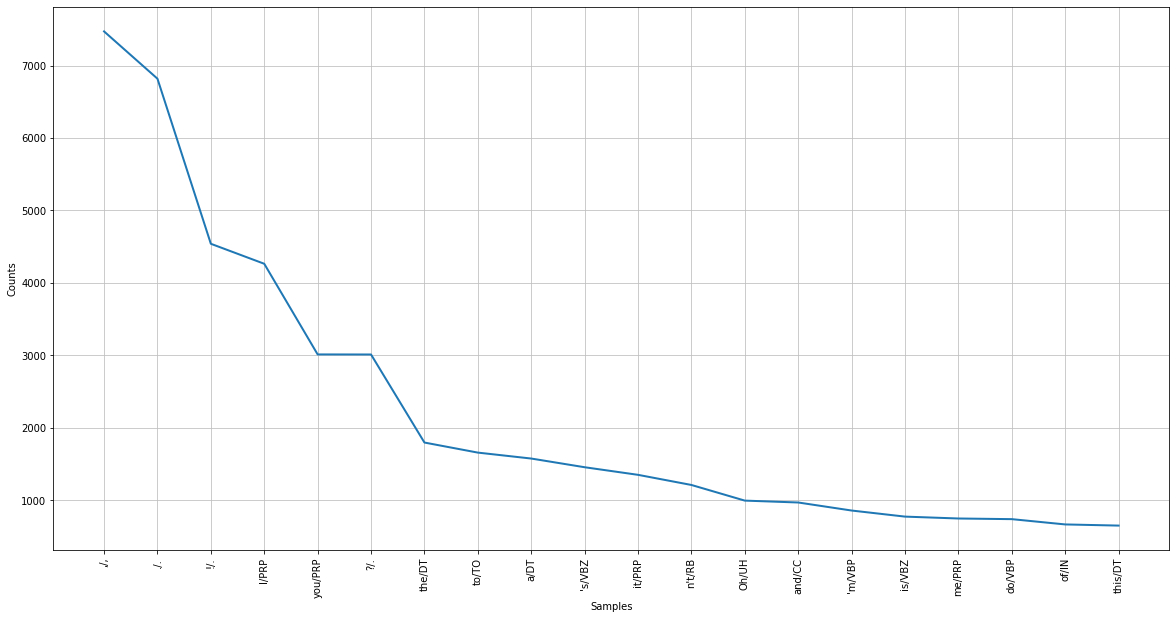

In [64]:
plt.figure(figsize=(20,10))
text.plot(20)

# 벡터화

자주 사용하는 토큰 10000개를 사용해서 데이터를 벡터로 표현한다.

BOW (Bag of Words) 방식으로 구현하며, CountVectorization을 사용한다.

마지막으로 numpy를 이용해 float으로 형 변환 작업을 수행하여 저장한다.

In [65]:
selected_words = [f[0] for f in text.vocab().most_common(5000)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

In [66]:
train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [68]:
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

np.save('x_train_en', x_train)
np.save('x_test_en', x_test)

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

np.save('y_train_en', y_train)
np.save('y_test_en', y_test)

In [69]:
print(x_train)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [2. 2. 0. ... 0. 0. 0.]]


In [70]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [2. 2. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [2. 2. 0. ... 0. 0. 0.]]


In [71]:
print(y_train)

[0. 0. 0. ... 5. 0. 7.]


In [72]:
print(y_test)

[5. 7. 0. ... 0. 0. 0.]
